In [1]:
#!pip install numpy matplotlib gudhi persim scipy networkx

## 1. Setup and Imports

This section will handle the necessary imports and any initial setup required for the notebook.


In [2]:
# Import necessary libraries
import os
import shutil
import numpy as np
import gudhi as gd
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance
from persim import PersImage, PersistenceImager

# Set random seed for reproducibility
np.random.seed(14)
random.seed(14)

# Setup directory for saving figures
folder_path = 'output'
if not os.path.exists(folder_path):
    os.makedirs(folder_path, exist_ok=True)


## 2. Utility Functions

Here, we will define all the functions used throughout the notebook to keep the code organized and reusable.


In [3]:
def create_number_8(n_lower=10, n_upper=10):
    """
    Generate points in the shape of the number '8' with added noise.
    """
    # Generate points for the upper and lower loops
    t_upper = np.linspace(0, 2 * np.pi, n_upper)
    x_upper = 0.6 * np.sin(t_upper) + np.random.normal(0, 0.1, size=t_upper.size)
    y_upper = 0.6 * np.cos(t_upper) + 0.8 + np.random.normal(0, 0.05, size=t_upper.size)
    t_lower = np.linspace(0, 2 * np.pi, n_lower)
    x_lower = np.sin(t_lower) + np.random.normal(0, 0.05, size=t_lower.size)
    y_lower = np.cos(t_lower) - 0.8 + np.random.normal(0, 0.05, size=t_lower.size)
    
    x = np.concatenate((x_upper, x_lower))
    y = np.concatenate((y_upper, y_lower))
    return np.column_stack((x, y))

def plot_persistence_diagram(persistence):
    """Plot and save the persistence diagram."""
    plt.figure()
    gd.plot_persistence_diagram(persistence)
    handles = [plt.Line2D([0], [0], color='red', lw=2, label='0-dim'),
               plt.Line2D([0], [0], color='dodgerblue', lw=2, label='1-dim')]
    plt.legend(handles=handles, loc='upper right', frameon=False)
    file_name = 'figs/PDiagram'
    plt.savefig(f'{file_name}.png', bbox_inches='tight')  # Save as PNG
    plt.savefig(f'{file_name}.svg', bbox_inches='tight')  # Save as SVG
    plt.show()

def plot_point_cloud_with_balls(points, epsilon):
    """
    Plot the point cloud with balls of radius epsilon/2.
    """
    plt.figure(figsize=(5, 5))
    ball_radius = epsilon / 2
    for point in points:
        circle = plt.Circle(point, ball_radius, color='red', fill=True, alpha=0.5)
        plt.gca().add_patch(circle)
    plt.scatter(points[:, 0], points[:, 1], c='black', marker='o')
    plt.axis('equal')
    plt.axis('off')
    plt.savefig(f'{folder_path}/P8_{epsilon}.png', bbox_inches='tight')
    plt.savefig(f'{folder_path}/P8_{epsilon}.pdf', bbox_inches='tight')
    plt.show()


## 3. Main Execution and Visualization
This section executes the main operations and visualizations for the point cloud data.

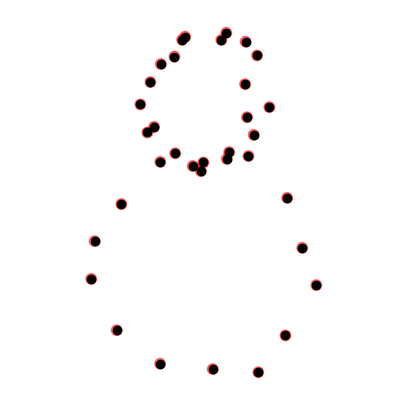

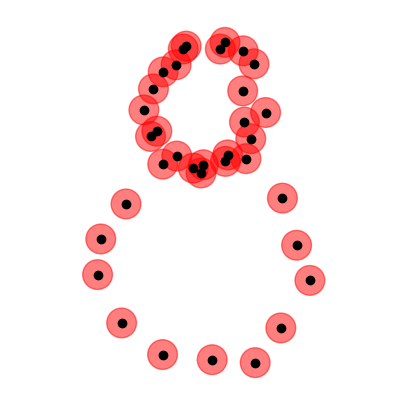

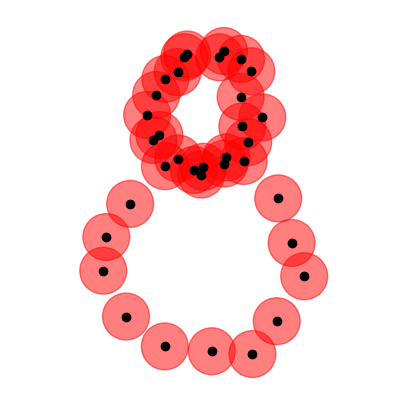

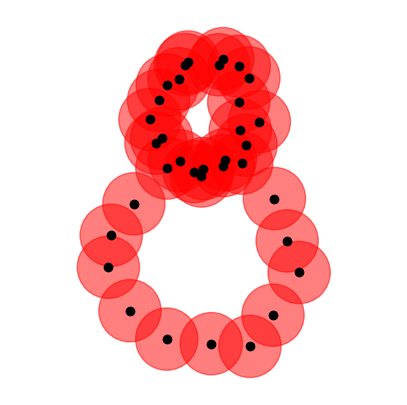

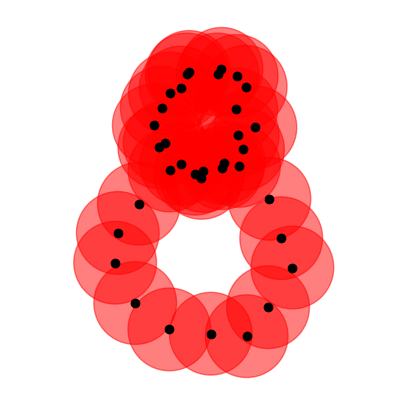

In [4]:
# Generate point cloud
points = create_number_8(n_lower=15, n_upper=20)

# Plot point cloud with different epsilon values
filtration_values = [0.1, 0.3, 0.5, 0.7, 1.0]  # Example epsilon values for visualization
for epsilon in filtration_values:
    plot_point_cloud_with_balls(points, epsilon)



## 4. Persistence Computations
Compute persistence diagrams and related visualizations such as barcodes and landscapes.

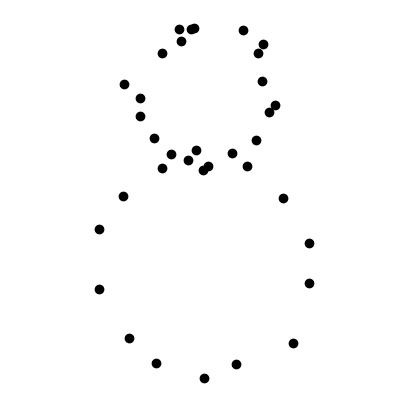

/opt/miniconda3/lib/python3.12/site-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


FileNotFoundError: [Errno 2] No such file or directory: 'figs/PDiagram.png'

<Figure size 640x480 with 0 Axes>

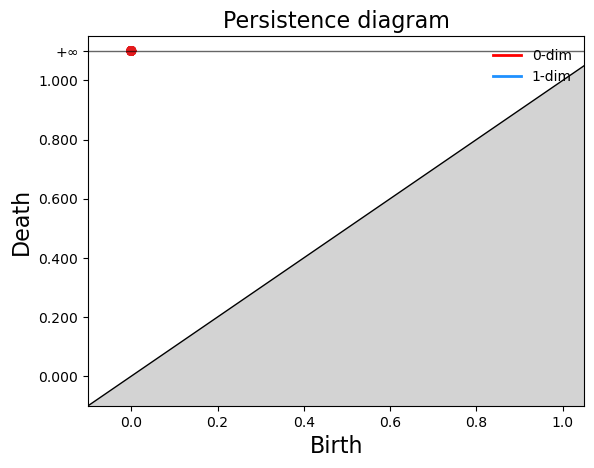

In [5]:
# Main code execution for Persistence Diagrams
points = create_number_8(n_lower=15, n_upper=20)
dist_matrix = distance.pdist(points)
max_dist = np.max(dist_matrix)
filtration_values = [0, 0.25, 0.75, 1.5, 1.75, 2, max_dist]

# Plot initial point cloud

 
# Process each filtration value
for epsilon in filtration_values:
    plot_point_cloud_with_balls(points, epsilon)
    rips_complex = gd.RipsComplex(points=points, max_edge_length=epsilon)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistence = simplex_tree.persistence()
    plot_persistence_diagram(persistence)



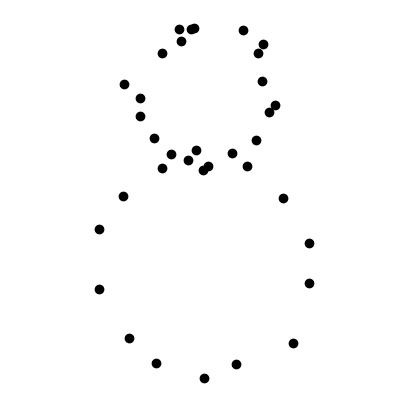

FileNotFoundError: [Errno 2] No such file or directory: 'figs/PBarcode_0.png'

<Figure size 640x480 with 0 Axes>

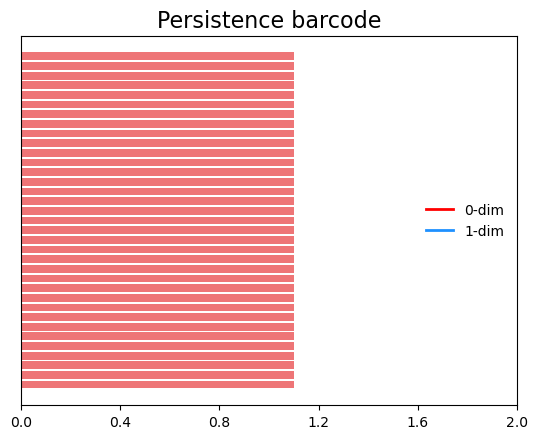

In [6]:
#Persistence Barcode computations

def plot_persistence_barcode(persistence, epsilon, max_dist):
    """Plot and save the persistence barcode."""
    plt.figure()
    gd.plot_persistence_barcode(persistence)
    ax = plt.gca()
    max_x = max(epsilon, max_dist / 2)
    ax.set_xlim(0, max_x)
    x_ticks = np.arange(0, max_x + 0.4, 0.4)
    ax.set_xticks(x_ticks)
    handles = [plt.Line2D([0], [0], color='red', lw=2, label='0-dim'),
               plt.Line2D([0], [0], color='dodgerblue', lw=2, label='1-dim')]
    plt.legend(handles=handles, loc='center right', frameon=False)
    file_name = f'figs/PBarcode_{np.round(epsilon, 1)}'
    plt.savefig(f'{file_name}.png', bbox_inches='tight')  # Save as PNG
    plt.savefig(f'{file_name}.svg', bbox_inches='tight')  # Save as SVG
    plt.show()
    
    
for epsilon in filtration_values:
    plot_point_cloud_with_balls(points, epsilon)
    rips_complex = gd.RipsComplex(points=points, max_edge_length=epsilon)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistence = simplex_tree.persistence()
    plot_persistence_barcode(persistence, epsilon, max_dist)
 
     

5. Analysis and Further Exploration
Perform additional analysis, calculate Betti numbers, and explore persistence landscapes.

In [7]:
# Additional analysis, e.g., computing Betti numbers for various thresholds
def calculate_betti_numbers(persistence, thresholds):
    betti_numbers = []
    for threshold in thresholds:
        betti_0 = sum(1 for interval in persistence if interval[0] == 0 and interval[1][0] <= threshold < interval[1][1])
        betti_1 = sum(1 for interval in persistence if interval[0] == 1 and interval[1][0] <= threshold < interval[1][1])
        betti_numbers.append((betti_0, betti_1))
    return betti_numbers

 
betti_numbers = calculate_betti_numbers(persistence, filtration_values)
for threshold, (betti_0, betti_1) in zip(filtration_values, betti_numbers):
    print(f'Threshold: {threshold}, Betti-0: {betti_0}, Betti-1: {betti_1}')


Threshold: 0, Betti-0: 35, Betti-1: 0
Threshold: 0.25, Betti-0: 35, Betti-1: 0
Threshold: 0.75, Betti-0: 35, Betti-1: 0
Threshold: 1.5, Betti-0: 35, Betti-1: 0
Threshold: 1.75, Betti-0: 35, Betti-1: 0
Threshold: 2, Betti-0: 35, Betti-1: 0
Threshold: 3.2459084902337882, Betti-0: 35, Betti-1: 0


## Persistence Landscape

The persistence landscape is a powerful tool in Topological Data Analysis that transforms persistence diagrams into a functional form. This transformation allows for statistical analysis and machine learning applications, offering a robust way to incorporate topological features into data analysis frameworks.

In this section, we will:
- **Generate a persistence diagram** using our dataset to identify significant topological features.
- **Transform the persistence diagram into a persistence landscape**, facilitating easier manipulation and analysis.
- **Visualize the persistence landscape** to better understand the underlying topological structure of the data.

This approach enables us to capture and utilize the geometric and topological information that traditional data analysis methods might overlook.


<>:54: SyntaxWarning: invalid escape sequence '\l'
<>:56: SyntaxWarning: invalid escape sequence '\e'
<>:54: SyntaxWarning: invalid escape sequence '\l'
<>:56: SyntaxWarning: invalid escape sequence '\e'
/var/folders/dm/jthvznm15jg8_v7_3nl128n00000gp/T/ipykernel_2459/1844397757.py:54: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(epsilon_thresholds, landscape.values[i], label=f'$\lambda^{{{i + 1}}}$', linewidth=4)
/var/folders/dm/jthvznm15jg8_v7_3nl128n00000gp/T/ipykernel_2459/1844397757.py:56: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Threshold $\epsilon$')
/var/folders/dm/jthvznm15jg8_v7_3nl128n00000gp/T/ipykernel_2459/1844397757.py:54: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(epsilon_thresholds, landscape.values[i], label=f'$\lambda^{{{i + 1}}}$', linewidth=4)
/var/folders/dm/jthvznm15jg8_v7_3nl128n00000gp/T/ipykernel_2459/1844397757.py:56: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Threshold $\epsilon$')


Threshold: 0.00 | Betti-0: 35, Betti-1: 0
Threshold: 0.25 | Betti-0: 17, Betti-1: 0
Threshold: 0.75 | Betti-0: 1, Betti-1: 2
Threshold: 1.50 | Betti-0: 1, Betti-1: 1
Threshold: 1.75 | Betti-0: 1, Betti-1: 0
Threshold: 2.00 | Betti-0: 1, Betti-1: 0
Threshold: 3.25 | Betti-0: 1, Betti-1: 0


FileNotFoundError: [Errno 2] No such file or directory: 'figs/landscape.svg'

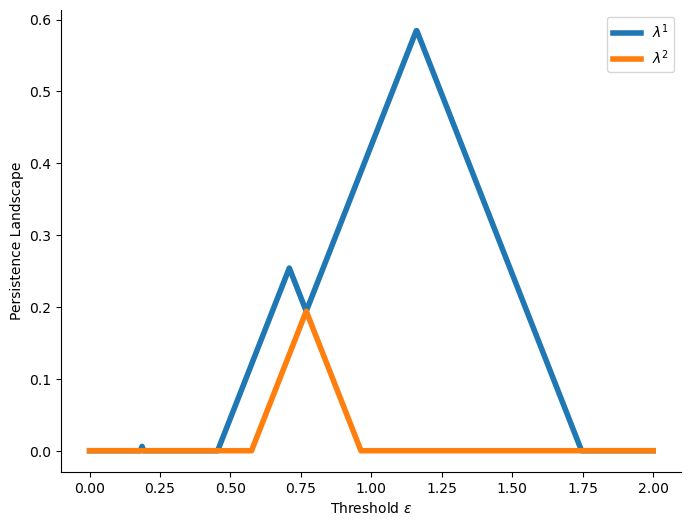

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd

from persim import PersLandscapeApprox


# Function to calculate Betti numbers at given thresholds
def calculate_betti_numbers(persistence_intervals, thresholds):
    """Calculate Betti numbers at given thresholds."""
    betti_numbers = []
    for threshold in thresholds:
        betti_number = sum(1 for birth, death in persistence_intervals if birth <= threshold < death)
        betti_numbers.append(betti_number)
    return betti_numbers

# Define the thresholds for Betti number calculations
filtration_values
epsilon = 2  # Maximum filtration value for Rips complex

# Create the Rips complex and compute the persistence diagram
rips_complex = gd.RipsComplex(points=points, max_edge_length=epsilon)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
persistence = simplex_tree.persistence()

# Extract persistence intervals for 0 and 1 dimensions
persistence_0 = simplex_tree.persistence_intervals_in_dimension(0)
persistence_1 = simplex_tree.persistence_intervals_in_dimension(1)



# Calculate Betti numbers for dimension 0 and 1 at each threshold
betti_0_list = calculate_betti_numbers(persistence_0, filtration_values)
betti_1_list = calculate_betti_numbers(persistence_1, filtration_values)

# Output the Betti numbers at each threshold
for i, threshold in enumerate(filtration_values):
    print(f"Threshold: {threshold:.2f} | Betti-0: {betti_0_list[i]}, Betti-1: {betti_1_list[i]}")

# Ensure persistence intervals are correctly structured for PersLandscapeApprox
if persistence_1.shape[0] > 0:
    persistence_1d = persistence_1
else:
    persistence_1d = np.array([])

# Create the persistence landscape object
landscape = PersLandscapeApprox(dgms=[persistence_1d], hom_deg=0, start=0, stop=2, num_steps=1000)

# Plot each landscape layer (depth)
plt.figure(figsize=(8, 6))
epsilon_thresholds = np.linspace(landscape.start, landscape.stop, landscape.num_steps)

for i in range(len(landscape.values)):
    plt.plot(epsilon_thresholds, landscape.values[i], label=f'$\lambda^{{{i + 1}}}$', linewidth=4)

plt.xlabel('Threshold $\epsilon$')
plt.ylabel('Persistence Landscape')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a legend to distinguish between layers
plt.legend()

# Remove the grid
plt.grid(False)
plt.savefig('figs/landscape.svg', bbox_inches='tight')  # Save as SVG
plt.savefig('figs/landscape.pdf', bbox_inches='tight')  # Save as SVG
plt.show()


## Persistence Curves

This script uses Topological Data Analysis  to examine a dataset through persistent homology, capturing key topological features:

1. **Rips Complex Construction:** Starts by creating a Rips complex from the dataset based on a maximum edge length, setting the stage for computing persistence.

2. **Persistence Computation:** Calculates the persistence of features, visualized in a persistence diagram, which highlights the birth and death of shapes like loops as scaling parameters change.

3. **Feature Extraction:** Extracts 1-dimensional intervals (loops) from the persistence diagram, essential for analyzing the dataset's topological backbone.

4. **Generating Function and Summary Statistics:** Applies a generating function and summary statistics (sum and mean) to these intervals, summarizing the topological information succinctly.

5. **Persistence Curves:** Plots persistence curves to visualize the evolution of summarized topological features with changes in the filtration parameter, offering insights into the dataset’s intrinsic structure.

 


<>:56: SyntaxWarning: invalid escape sequence '\e'
<>:56: SyntaxWarning: invalid escape sequence '\e'
/var/folders/dm/jthvznm15jg8_v7_3nl128n00000gp/T/ipykernel_2459/3620393994.py:56: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Filtration Parameter $\epsilon$')
/var/folders/dm/jthvznm15jg8_v7_3nl128n00000gp/T/ipykernel_2459/3620393994.py:56: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Filtration Parameter $\epsilon$')


FileNotFoundError: [Errno 2] No such file or directory: 'figs/per_curve.pdf'

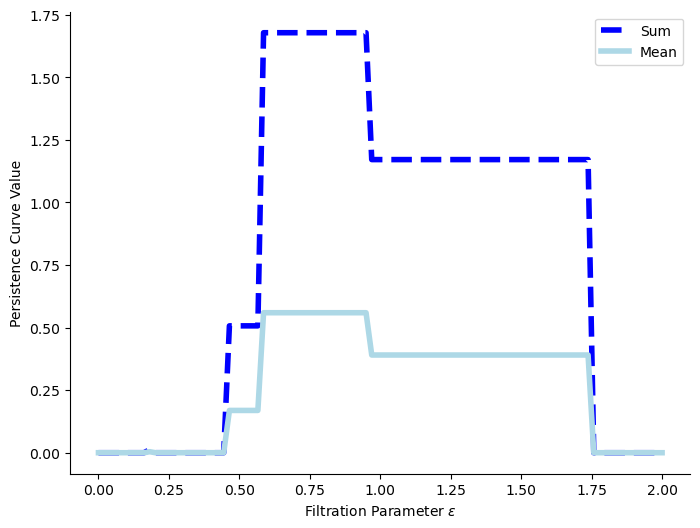

In [9]:


# Step 1: Create the Rips complex and compute persistence
rips_complex = gd.RipsComplex(points=points, max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
persistence = simplex_tree.persistence()

# Step 2: Extract 1-dimensional intervals (loops)
one_dim_intervals = simplex_tree.persistence_intervals_in_dimension(1)

# Define the generating function psi (e.g., lifespan)
def generating_function(b, d, epsilon):
    """Generating function for 1D features that returns the lifespan (d - b) if the interval is in range."""
    return d - b if b <= epsilon <= d else 0

# Define the summary statistic T (e.g., sum and mean)
def summary_statistic_sum(values):
    """Summary statistic that returns the sum of values."""
    return np.sum(values)

def summary_statistic_mean(values):
    """Summary statistic that returns the mean of values."""
    return np.mean(values) if values else 0

# Define the range of filtration parameters epsilon
epsilon_values = np.linspace(0, 2, 100)

# Calculate the Persistence Curve for 1-dimensional features using sum
persistence_curve_sum = []

for epsilon in epsilon_values:
    # Apply the generating function to each interval in the persistence diagram
    values = [generating_function(b, d, epsilon) for b, d in one_dim_intervals]
    
    # Apply the summary statistic (sum) to aggregate the results
    persistence_value_sum = summary_statistic_sum(values)
    
    # Store the result
    persistence_curve_sum.append(persistence_value_sum)

# Calculate the Persistence Curve for 1-dimensional features using mean
persistence_curve_mean = []

for epsilon in epsilon_values:
    # Apply the generating function to each interval in the persistence diagram
    values = [generating_function(b, d, epsilon) for b, d in one_dim_intervals]
    
    # Apply the summary statistic (mean) to aggregate the results
    persistence_value_mean = summary_statistic_mean(values)
    
    # Store the result
    persistence_curve_mean.append(persistence_value_mean)

# Plot the Persistence Curves
plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, persistence_curve_sum, color='blue', linewidth=4,linestyle='--', label='Sum')
plt.plot(epsilon_values, persistence_curve_mean, color='lightblue', linewidth=4, label='Mean')
plt.xlabel('Filtration Parameter $\epsilon$')
plt.ylabel('Persistence Curve Value')
# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Remove the grid
plt.grid(False)

# Add a legend
plt.legend()

# Save and show the plot
plt.savefig('figs/per_curve.pdf', bbox_inches='tight')
plt.show()


## Generating Persistence Images with Persim

This script uses the `persim` library to analyze topological features of a dataset using persistent homology:

1. **Rips Complex and Persistence:** Constructs a Rips complex from the dataset and computes persistence. This identifies the birth and death of topological features like loops, crucial for understanding the underlying data structure.

2. **Extracting Topological Features:** Focuses on 1-dimensional intervals (loops) extracted from the persistence calculations, which are essential for analyzing the dataset's topological backbone.

3. **Preparation for Imaging:** Converts these intervals into a numpy array format required by the `PersImage` class to facilitate the generation of persistence images.

4. **Persistence Image Generation:** Iteratively creates persistence images for various scales (defined by the `spread` parameter). These images visually represent how topological features persist over different resolutions, enhancing interpretability.

5. **Visualization:** Plots these images to provide a visual analysis of the persistence of topological features, aiding in more intuitive data analysis and insights.

This approach integrates topological data analysis (TDA) with advanced visualization techniques to offer a deeper understanding of the intrinsic structures within complex datasets.


PersImage(pixels=[20, 20], spread=0.1, specs=None, kernel_type="gaussian", weighting_type="linear")


/var/folders/dm/jthvznm15jg8_v7_3nl128n00000gp/T/ipykernel_2459/1988903856.py:18: DeprecationWarning: Call to deprecated class PersImage. (Replaced with the class `persim.PersistenceImager`.) -- Deprecated since version 0.1.5.
  pim =  PersImage(spread=sp, pixels=[20, 20],weighting_type="linear", kernel_type='gaussian', verbose=True)


FileNotFoundError: [Errno 2] No such file or directory: 'figs/per_image_0.1.pdf'

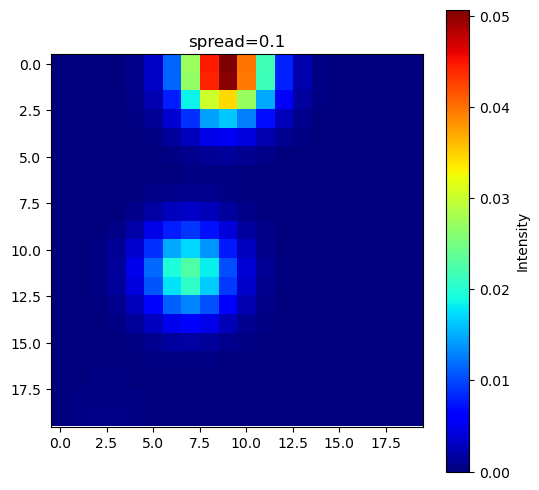

In [10]:
import persim
from persim import PersImage, PersistenceImager

# Step 1: Create the Rips complex and compute persistence
rips_complex = gd.RipsComplex(points=points, max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
persistence = simplex_tree.persistence()

# Step 2: Extract 1-dimensional intervals (loops)
one_dim_intervals = simplex_tree.persistence_intervals_in_dimension(1)

# Step 3: Convert intervals to numpy array format required by PersImage
pers_diagram = np.array(one_dim_intervals)

# Step 4: Create a Persistence Image
 
for sp in [0.1, 0.2,0.8]:
    pim =  PersImage(spread=sp, pixels=[20, 20],weighting_type="linear", kernel_type='gaussian', verbose=True)
    persistence_image = pim.transform(pers_diagram)
    
    # Step 5: Plot the Persistence Image
    plt.figure(figsize=(6, 6))
    plt.imshow(persistence_image, cmap='jet', interpolation='nearest')#copper, hsv
    plt.colorbar(label='Intensity')
    plt.title(f'spread={sp}')
    plt.savefig(f'figs/per_image_{sp}.pdf', bbox_inches='tight')
    plt.show()


## Topological Analysis of Numeric Shapes '8' and '9'

This code compares the topological features of numeric shapes, specifically the numbers '8' and '9' by using the powerful GUDHI library and its Wasserstein distance.

### Key Steps in the Analysis:

1. **Point Cloud Generation:** Create simulated point clouds for the numbers '8' and '9', introducing a controlled level of noise to mimic real-world data variability.
2. **Persistence Diagrams Computation:** Utilize the Rips complex approach to calculate persistence diagrams from the point clouds, highlighting significant topological features such as loops and voids.
3. **Wasserstein Distance Calculation:** Compute the Wasserstein distance between the persistence diagrams of '8' and '9' to quantitatively assess their topological dissimilarity.
4. **Visual Comparison:** Plot both persistence diagrams side-by-side for a visual representation of the topological features and their differences.

 


In [11]:
# you may have to install the Optimal Transport Library first
#!pip install POT
import ot


Wasserstein Distance between PD of '8' and '9': 0.44446580056146057


FileNotFoundError: [Errno 2] No such file or directory: 'figs/pd_8_and_9.svg'

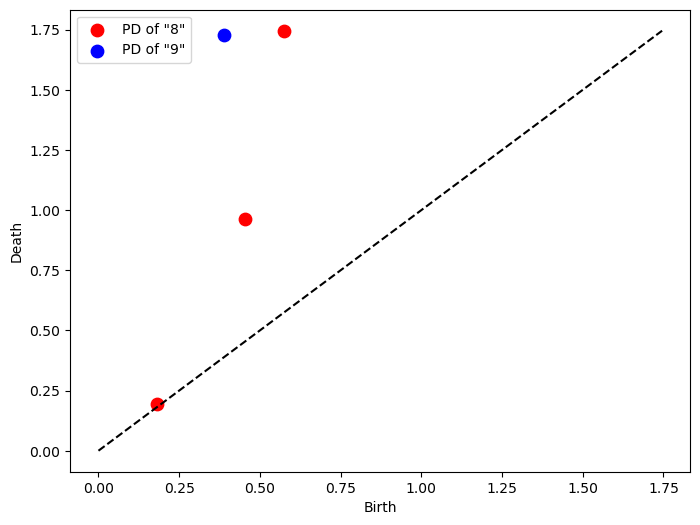

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
from gudhi.wasserstein import wasserstein_distance

np.random.seed(14)
random.seed(14)
def create_number_9(n_points=100):
    # Parameters for noise
    noise_level = 0.05  # Adjust this value to increase or decrease noise intensity

    # Create the circular part
    num_points = int(n_points * 0.7)
    t = np.linspace(0, 2 * np.pi, num_points)
    x_circle = np.cos(t) + np.random.normal(0, noise_level, num_points)
    y_circle = np.sin(t) + 1.5 + np.random.normal(0, noise_level, num_points)

    # Create the tail
    tail_length = int(n_points * 0.3)
    x_tail = np.zeros(tail_length) + 0.9 + np.random.normal(0, noise_level, tail_length)
    y_tail = np.linspace(min(y_circle), -1.8, tail_length) + np.random.normal(0, noise_level, tail_length)  # Extending below the circle

    # Combine the circular part with the tail
    x = np.concatenate([x_circle, x_tail])
    y = np.concatenate([y_circle, y_tail])
    
    # Stack into a point cloud
    points = np.vstack((x, y)).T
    return points


points_9 = create_number_9(35)

def compute_persistence_diagram(points):
    rips_complex = gd.RipsComplex(points=points, max_edge_length=2)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    simplex_tree.persistence()
    return simplex_tree.persistence_intervals_in_dimension(1)  # 1-dimensional features (loops)

pd_8 = compute_persistence_diagram(points)
pd_9 = compute_persistence_diagram(points_9)

# Compute Wasserstein distance between the two persistence diagrams
wasserstein_dist = wasserstein_distance(pd_8, pd_9)
print(f"Wasserstein Distance between PD of '8' and '9': {wasserstein_dist}")

dir = "figs/"
# Plot both persistence diagrams on the same plot
plt.figure(figsize=(8, 6))
plt.scatter(pd_8[:, 0], pd_8[:, 1], c='red', label='PD of "8"',s=80)
plt.scatter(pd_9[:, 0], pd_9[:, 1], c='blue', label='PD of "9"',s=80)
plt.plot([0, max(np.max(pd_8[:, 1]), np.max(pd_9[:, 1]))], [0, max(np.max(pd_8[:, 1]), np.max(pd_9[:, 1]))], 'k--')  # Diagonal line y = x
plt.xlabel("Birth")
plt.ylabel("Death")
plt.legend(loc='lower right') 
plt.legend()
plt.savefig(dir+"pd_8_and_9.svg")
plt.show()


